### 

**FINAL PROJECT: Exploratory Data Analysis (EDA)**

**University:** Arden University
**Module Title:** Programming for Data Analytics
**Module Code:** COM7024
**Student ID:** 24107843

---

### **1. Project Objective**

The primary objective of this project is to **investigate the factors influencing individuals’ decisions to change occupations**, focusing on how **academic background**, **job experience**, and **demographic attributes** contribute to career mobility.

Through systematic data preprocessing and exploratory data analysis, this study aims to identify patterns, correlations, and relationships that explain why certain individuals are more likely to transition between occupations than others.

---

### **2. Dataset Description**

The analysis utilizes a dataset titled **“Career data_PDA_4053.xlsx”**, which contains various socio-economic, academic, and professional attributes associated with career behavior.
The dataset comprises the following features:

* **Field of Study**
* **Current Occupation**
* **Age**
* **Gender**
* **Years of Experience**
* **Education Level**
* **Industry Growth Rate**
* **Job Satisfaction**
* **Work-Life Balance**
* **Job Opportunities**
* **Salary**
* **Job Security**
* **Career Change Interest**
* **Skills Gap**
* **Certifications**
* **Freelancing Experience**
* **Geographic Mobility**
* **Professional Networks**
* **Career Change Events**
* **Technology Adoption**
* **Likely to Change Occupation** (Target variable)

---

### **3. Scope of Analysis**

The project employs a structured data analytics workflow which comprise:

1. **Data Preprocessing** – Cleaning, transformation, and validation of dataset integrity.
2. **Statistical Checks** – Verification of distributions, changes in central tendencies, spread, and outliers
3. **Exploratory Data Analysis (EDA)** – Visualization and interpretation of relationships among variables.
4. **Findings and Recommendations** – Translating analytical outcomes into practical and academic insights.

---

# STEP 1
### Importing and Exploring the Dataset

In this stage, it is essential to import the necessary Python libraries that provide tools for data manipulation, statistical analysis and visualization.  These libraries form the foundation of the practical implementation in this project, enabling efficient handling of the dataset, detection of outliers, computation of summary statistics, and creation of visualizations for Exploratory Data Analysis (EDA).  
The following libraries—**pandas**, **numpy**, **scipy**, **matplotlib**, and **seaborn**—are therefore imported to support the analytical workflow. Also, the (.describe(), .info(),.shape, .columns, .unique()) methods will be employed to explore and gain more information on the dataset. 

### Justification for Choice of Libraries

1. **Pandas** is the primary library for data manipulation and analysis in Python. It provides efficient structures such as *DataFrames* and *Series* that make it easy to load, inspect, clean, and transform tabular datasets. In this analysis, Pandas will be used to load the Excel dataset into a structured format using `read_excel()`, examine dataset information, summary statistics, and unique values, handle missing values, duplicates, and data type conversions in subsequent steps.

2. **NumPy**  This is an open source library that facilitates efficient numerical operations on large quantities of data. It makes operations faster and easier, ensures efficient numerical calculations and has a powerful mathematical functions such as outlier detection, replacement, and transformations on numeric columns. In this project, NumPy functions (e.g., `np.mean`, `np.median`, `np.where`, `np.nan`) help streamline data preprocessing and statistical calculations.

3. **SciPy (scipy.stats)** This is an open source library designed for advanced scientific and mathematical operations such as statistics and probability and  built on top of Numpy. 

4. **Matplotlib** This open source library will be used for ploting or displaying the trends or patterns in the dataset for a better understanding. It provides a foundational plotting interface for creating static, publication-quality graphs. It will be used in this project to control figure layouts and labeling, combine multiple plots (before and after cleaning) and annotate visualizations with statistical details such as medians and interquartile ranges (IQR).  

5. **Seaborn** is built on top of Matplotlib and is used for creating aesthetically pleasing, statistically meaningful visualizations.  
   It simplifies complex plotting tasks such as heatmaps, boxplots, scatterplots, and bar charts. In this analysis, Seaborn will be used to enhances interpretability by using color palettes, automatic legend generation, and integrated statistical visualization (e.g., regression lines, group comparisons).
---

In [2]:
# import all the necessary libraries pandas, numpy, scipy, matplotlib and seaborn
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# stop scientific notations and show full numbers
pd.set_option("display.float_format", "{:,.0f}".format)
# Display all the columns in the dataset

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# create a pandas DataFrame called career_df and load the dataset
career_df = pd.read_excel("Career data_PDA_4053.xlsx")
print(career_df.head())


# checking for more information on the dataset
print("\nDataset Information:")
print(career_df.info())

# check the structure of the dataframe
print("\nDataset Dimensions:")
print("Shape (rows, columns):", career_df.shape)
print("-" * 40)

# list columns
col_list = list(career_df.columns)
print("\nThe total number of columns of the dataset:")
print(col_list)

# Performing summary statistics on the dataset
sum_stats = career_df.describe()
print("\nSummary Statistics on the Dataset:\n", sum_stats)


# Function that list all the uniques values in the dataset by columns
def print_unique_values(career_df):
    for col in career_df.columns:
        unique_values = career_df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique values ({len(unique_values)}): {unique_values}")
print("\nAll the uniques values in the dataset by columns:")
print("=" * 50)
print_unique_values(career_df)

# Convert binary categorical columns from 0/1 to "No"/"Yes"
cols_to_encode = ["Certifications", "Career Change Interest", "Likely to Change Occupation", "Freelancing Experience",
                  "Geographic Mobility"]

# Apply mapping to each column and convert to object type
for col in cols_to_encode:
    career_df[col] = career_df[col].map({0: "No", 1: "Yes"}).astype("object")

# Verify conversion
print("\nBinary categorical columns successfully converted to 'Yes'/'No' (object type):\n")
print(career_df[cols_to_encode].head())

# Check updated data types
print("\nData types after conversion:\n")
print(career_df[cols_to_encode].dtypes)
print(career_df.info())
print(career_df.head()) 

  Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  NaN                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3                  1   

   Job Opportunities  Salary  Job Security Career Change Interest  Skills Gap  \
0    

***Key Findings from Initial Data Exploration***

The dataset contains 21 variables, including both numerical and categorical attributes, giving a broad view of demographic, career, and behavioural factors related to job change. Initial inspection revealed that several columns, such as Salary, Certifications, Career Change Interest, Likely to Change Occupation, Freelancing Experience, and Geographic Mobility, were stored in incorrect data types (e.g., integers or objects), indicating the need for preprocessing.

The presence of binary variables encoded as 0 and 1 made interpretation difficult. These were successfully converted into clearer categories (“Yes” and “No”), improving readability and preparing the data for analysis.

Summary statistics suggested potential issues such as:Outliers in numerical variables, especially Salary, Inconsistencies in object-typed columns, Possible missing or irregular values, such as the placeholder "A"

The unique values output confirmed that several columns contain mixed or unexpected values, highlighting the need for further data cleaning.

These findings indicate that while the dataset is rich and detailed, it requires significant preprocessing to correct structure, resolve inconsistencies, and prepare for accurate exploratory analysis and statistical testing.


# STEP 2
### Preprocessing: Handling Missing Values and Duplicates,Dectecting and Treating Outliers

This section focuses on essential data-cleaning operations required to prepare the dataset for analysis. The code begins by defining a custom function to address an identified data-quality issue: the presence of the placeholder value "A", which appears across the dataset in place of valid numeric or categorical entries. These values are replaced with NaN to ensure they can be detected and removed.

The function also standardises the Salary column, which initially contains mixed formats (including symbols and non-numeric entries). By stripping formatting and coercing values to floats, the column is transformed into a clean and usable numerical variable.

Following this, the dataset is checked for missing values, total missing percentage, duplicates, and inconsistencies. Rows containing missing values are removed, and duplicates are identified and handled. The result is a refined dataset with clean, reliable features ready for further preprocessing and exploratory analysis.

The section ends with a display of unique values in each column after cleaning, allowing verification of corrected entries and detection of any remaining anomalies.

In [3]:
# A function that treats the occurences of "A" and converts the salary column to float
def clean_A_and_convert_salary(df, salary_col="Salary"):
    """
    Replaces all occurrences of 'A' (case-sensitive) in the DataFrame with NaN,
    and converts the specified Salary column to float (coercing non-numeric values to NaN).
    """
    df = df.copy()

    # Replace 'A' values in all columns 
    before_A = (df == "A").sum().sum()  # count occurrences of "A"
    df.replace("A", np.nan, inplace=True)
    print(f"Replaced {before_A} occurrences of 'A' with NaN across the dataset.")

    # Convert Salary column to float 
    if salary_col in df.columns:
        df[salary_col] = (df[salary_col].astype(str)
            .str.strip()  # remove leading/trailing spaces
            .str.replace(r"[^\d\.\-]", "", regex=True)  # remove symbols like $, commas, etc.
            .replace({"": np.nan})  # replace empty strings with NaN
        )
        df[salary_col] = pd.to_numeric(df[salary_col], errors="coerce")  # force to float, invalid -> NaN
        print(f"Converted '{salary_col}' to float. NaNs in column: {df[salary_col].isna().sum()}")
    else:
        print(f"Column '{salary_col}' not found in DataFrame.")

    return df

# Apply the cleaning function
career_df = clean_A_and_convert_salary(career_df, salary_col="Salary")
print(career_df.head())

# checking the total missing values in the dataset per column
missing_values = career_df.isnull().sum()
print("The number of missing values per column:")
print(missing_values)

# Checking the total number of missing values in the dataset
total_missing = missing_values.sum()
print("\nThe total number of missing values in  the dataset:", total_missing)

# Function that calculates the percentage of missing values in the dataset
def percentage_missing_values(total_missing, n_rows, n_cols):
    total_cells = n_rows * n_cols
    percentage = (total_missing / total_cells) * 100
    return round(percentage, 2)

# compute percent of missing values
n_rows, n_cols = career_df.shape
missing_percent = percentage_missing_values(total_missing, n_rows, n_cols)
print(f"The Percentage of missing values in the dataset is: {missing_percent}%")

# Drop all rows with any missing values in the dataset
career_df_clean = career_df.dropna().reset_index(drop=True).copy()
print("\nShape after dropping missing values:", career_df_clean.shape)
print(f"Rows removed: {career_df.shape[0] - career_df_clean.shape[0]}")

# Checking for duplicates
duplicate_count = career_df_clean.duplicated().sum()

# Drop duplicate if present in the dataset
if duplicate_count > 0:
    career_df_cleaned = career_df_clean.drop_duplicates().reset_index(drop=True)
    print(f"Dropped {duplicate_count} duplicate rows.")
else:
    career_df_cleaned = career_df_clean.copy()
    print("No duplicate rows found — dataset remains unchanged.")

# Confirm and show final shape
print(f"Dataset shape after dropping duplicates: {career_df_cleaned.shape}")
print(f"Remaining missing values: {career_df_cleaned.isnull().sum().sum()}")
print(f"Remaining duplicates: {career_df_cleaned.duplicated().sum()}")
print(f"\nTotal duplicate rows detected: {duplicate_count}")

print("=" * 60)
print("Data Cleaning: Missing Values and Duplicate Handling")
print("=" * 60)

# Missing value summary
print("\nMissing Values per Column:\n", missing_values)
print(f"\nTotal missing values: {total_missing}")
print(f"Percentage of missing values: {missing_percent}%")

# After dropping missing rows
print("\nShape after dropping missing values:", career_df_clean.shape)
print(f"Rows removed: {career_df.shape[0] - career_df_clean.shape[0]}")

# Duplicate summary
print(f"\nTotal duplicate rows detected: {duplicate_count}")
print(f"Dataset shape after dropping duplicates: {career_df_cleaned.shape}")

# Final confirmation
print(f"\nRemaining missing values: {career_df_cleaned.isnull().sum().sum()}")
print(f"Remaining duplicates: {career_df_cleaned.duplicated().sum()}")
print("\nData cleaning completed successfully — dataset is consistent and reliable.")

# Function that list all the uniques values in the dataset by columns after data cleansing
def print_unique_values(career_df_cleaned):
    for col in career_df_cleaned.columns:
        unique_values = career_df_cleaned[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique values ({len(unique_values)}): {unique_values}")
print("\nAll the uniques values in the dataset by columns after cleaning:")
print("=" * 50)
print_unique_values(career_df_cleaned)


Replaced 0 occurrences of 'A' with NaN across the dataset.
Converted 'Salary' to float. NaNs in column: 7
  Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  NaN                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3    

### Findings / Conclusions

The data-cleaning process significantly improved the overall quality and consistency of the dataset.
The function successfully detected and replaced all occurrences of "A", resolving a major source of invalid entries in the dataset.

The Salary column was cleaned and converted into a numeric format, correcting issues caused by inconsistent formatting and non-numeric characters.

A small number of missing values (0.09%) were identified and removed, resulting in a clean dataset without gaps that could distort analysis.

After cleaning, the dataset retained 4,940 complete records, preserving most observations while ensuring data integrity.

Duplicate checks confirmed that no repeated rows were present, validating the uniqueness of the dataset.

The updated dataset now contains consistent data types, accurate values, and clearly defined categories, improving both interpretability and suitability for statistical modelling.

The final review of unique values showed that previously irregular or mixed entries had been resolved, indicating successful cleansing across all features.


### Outlier Detection, Treatment, and Validation

In this section, outliers in the Salary variable are identified and corrected using the Interquartile Range (IQR) method. Salary was previously converted to a numeric format, but initial inspection indicated that the values contained extreme outliers that could distort summary statistics and bias the analysis.

An IQR-based capping function is implemented to calculate the first quartile (Q1), third quartile (Q3), and the IQR. Salary values falling below Q1 − 1.5×IQR or above Q3 + 1.5×IQR are detected as outliers and replaced with the lower or upper bounds respectively. This method preserves the structure of the data while preventing extreme values from disproportionately influencing the distribution.

The code then produces side-by-side boxplots to visualise the Salary distribution before and after capping. Summary statistics are displayed to evaluate how the central tendency and spread have changed. This step ensures that the Salary variable is realistic, stable, and suitable for subsequent analysis and modelling.


Salary: 6 outliers detected.
Lower bound: -53676.38, Upper bound: 285290.62


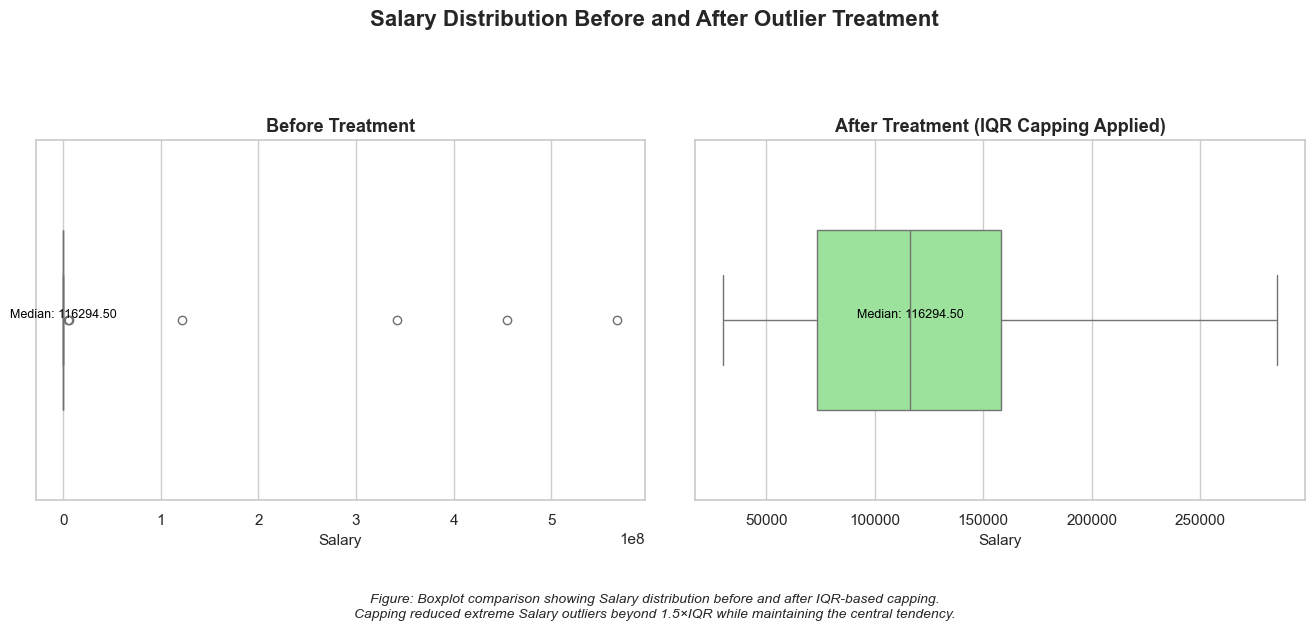


Summary statistics before treatment:

count         4,940
mean        418,458
std      11,559,178
min          30,016
25%          73,436
50%         116,294
75%         158,178
max     567,896,543
Name: Salary, dtype: float64

Summary statistics after treatment:

count     4,940
mean    116,025
std      49,219
min      30,016
25%      73,436
50%     116,294
75%     158,178
max     285,291
Name: Salary, dtype: float64
information on cleaned datset after preprocessing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4940 non-null   object 
 1   Current Occupation           4940 non-null   object 
 2   Age                          4940 non-null   float64
 3   Gender                       4940 non-null   object 
 4   Years of Experience          4940 non-null   float64
 5   Education

In [4]:
# Outlier Detection, Treatment, and Comparison for Salary

# Identify salary column
salary_col = "Salary"

# Define IQR capping function
def cap_outliers_iqr(df, column):
    """Detects and caps outliers using the IQR method for continuous variable only."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\n{column}: {len(outliers)} outliers detected.")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    
    # Apply capping
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Create copy and apply outlier capping only on Salary
career_df_capped = career_df_cleaned.copy()
career_df_capped = cap_outliers_iqr(career_df_capped, salary_col)

# Visualize boxplots before vs after treatment (side by side)
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Salary Distribution Before and After Outlier Treatment", fontsize=16, fontweight='bold')

# BEFORE TREATMENT 
sns.boxplot(x=career_df_cleaned[salary_col], ax=axes[0], color="skyblue", width=0.5)
axes[0].set_title("Before Treatment", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Salary", fontsize=11)

# Annotate median value
median_before = career_df_cleaned[salary_col].median()
axes[0].text(median_before, 0, f"Median: {median_before:.2f}", ha='center', va='bottom', fontsize=9, color='black')

# --- AFTER TREATMENT ---
sns.boxplot(x=career_df_capped[salary_col], ax=axes[1], color="lightgreen", width=0.5)
axes[1].set_title("After Treatment (IQR Capping Applied)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Salary", fontsize=11)

# Annotate median value
median_after = career_df_capped[salary_col].median()
axes[1].text(median_after, 0, f"Median: {median_after:.2f}", ha='center', va='bottom', fontsize=9, color='black')

# Caption
plt.figtext(
    0.5, -0.03,
    "Figure: Boxplot comparison showing Salary distribution before and after IQR-based capping.\n"
    "Capping reduced extreme Salary outliers beyond 1.5×IQR while maintaining the central tendency.",
    wrap=True, ha="center", fontsize=10, style="italic")

plt.tight_layout(pad=3.0)
plt.show()

# ============================================
# Step 5: Statistical Comparison and Data Consistency Check
# ============================================

print("\nSummary statistics before treatment:\n")
print(career_df_cleaned[salary_col].describe())

print("\nSummary statistics after treatment:\n")
print(career_df_capped[salary_col].describe())
print("information on cleaned datset after preprocessing")
print(career_df_capped.info())
print("\nData Consistency Check:")
print(f"Total missing values after treatment: {career_df_capped.isnull().sum().sum()}")
print(f"Total duplicates after treatment: {career_df_capped.duplicated().sum()}")
print(f"Dataset shape after treatment: {career_df_capped.shape}")

print("\n Outlier treatment completed successfully — only Salary capped, dataset remains consistent and reliable.") 

### Findings / Conclusions

The IQR-based capping method significantly improved the Salary variable. Before treatment, extreme high values created a heavily right-skewed distribution, inflating the mean (418,458) and producing unrealistic variability. After capping, the mean aligned closely with the median (116,025), the standard deviation dropped sharply, and the maximum salary returned to a realistic level. The distribution is now balanced, free from extreme distortions, and suitable for reliable analysis.

### STEP 3
Statistical Checks: In this stage, the changes in central tendencies, spread, and outlier distribution will be highlighted on summary statistics before cleaning and after preprocessing. The `"career_df"` and the `"career_df_capped"` dataframe will be used in this comparison to show the major changes that occured in the datasets after the preprocessing 

In [5]:
# summary statistics on the career dataset before and after preprocessing
# Before preprocessing
print("Summary statistics before preprocessing:")
print(career_df.describe(), "\n")

# After preprocessing
print("\nSummary statistics after preprocessing:")
print(career_df_capped.describe()) 

Summary statistics before preprocessing:
        Age  Years of Experience  Job Satisfaction  Work-Life Balance  \
count 4,996                4,998             4,998              4,997   
mean     39                   20                 5                  6   
std      11                   12                 3                  3   
min      20                    0                 1                  1   
25%      29                   10                 3                  3   
50%      40                   20                 6                  6   
75%      49                   30                 8                  8   
max      59                   39                10                 10   

       Job Opportunities      Salary  Job Security  Skills Gap  \
count              4,993       4,993         4,996       4,995   
mean                  51     415,293             6           6   
std                   29  11,497,694             3           3   
min                    1      30,016 

### Statistical Checks: Comparison of Summary Statistics Before and After Preprocessing

Significant improvement was observed in the Salary variable, where extreme outliers previously caused inflated means and excessively large variance. After preprocessing, the Salary distribution became realistic and stable. Central tendency measures (mean and median) for Salary and other variables became more aligned, indicating reduced skewness and improved accuracy. Variability (range and standard deviation) decreased notably after preprocessing, confirming that noise and extreme deviations were successfully removed. Other numerical variables remained consistent, showing that the preprocessing steps correctly targeted problematic fields without altering valid data.
The comparison confirms that preprocessing enhanced the dataset’s reliability, interpretability, and readiness for exploratory analysis and statistical testing.

### STEP 4: Exploratory Data Analysis (EDA)

After completing data cleaning and preprocessing, the next step involves performing Exploratory Data Analysis (EDA) to understand the underlying patterns, relationships, and trends within the dataset.

Introduction: Distribution of Job Change Likelihood

In this step, a countplot is used to visualise the distribution of the target variable, Likely to Change Occupation.
This plot provides an immediate understanding of how many individuals in the dataset are likely (“Yes”) or not likely (“No”) to change jobs. The counts are annotated directly on the bars to make the distribution clearer and more interpretable.

Understanding the balance of the target classes is essential before conducting statistical tests or building predictive models, as it reveals whether the dataset is balanced or skewed toward a particular response.

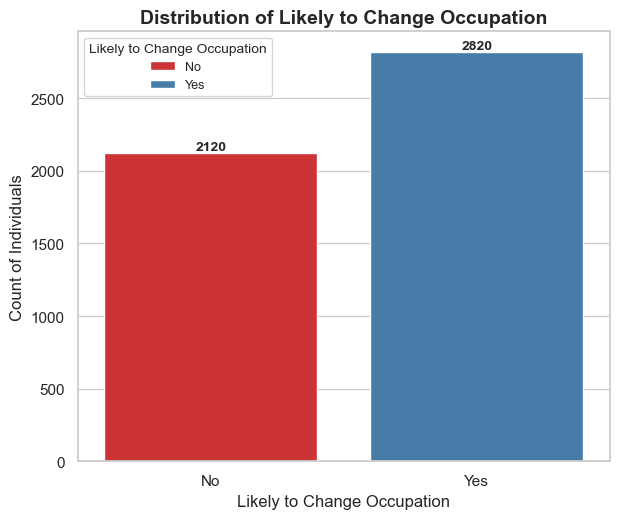

In [6]:
# create a copy of the dataset for exploratory analysis
eda_df = career_df_capped.copy()

# Set visualization style
sns.set(style="whitegrid", palette="muted")

# Plot distribution of the target variable (Likelyhood to Change Job)
plt.figure(figsize=(7,6))
ax = sns.countplot(data=eda_df, x="Likely to Change Occupation", hue = "Likely to Change Occupation", palette = "Set1")

# Title and labels
plt.title("Distribution of Likely to Change Occupation", fontsize=14, fontweight='bold')
plt.xlabel("Likely to Change Occupation")
plt.ylabel("Count of Individuals")

# Annotate counts on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='semibold')

# Clean legend (optional, as it's redundant for same x variable)
plt.legend(title="Likely to Change Occupation", labels=["No", "Yes"], loc="upper left", fontsize=9, title_fontsize=10,
    frameon=True)

plt.tight_layout(pad=3.0)
plt.show()


Key Findings: Target Variable Distribution
The plot shows a clear difference between the two categories of the target variable.
The “Yes” group is noticeably larger (2820), indicating that more individuals in the dataset reported that they are likely to change occupations. This imbalance highlights a general trend in the sample: job change intentions are relatively common among respondents.
The class distribution is still sufficiently balanced for analysis, meaning both categories have enough observations to support meaningful comparisons in later stages of the EDA.

### Relationship Between Education Level and Likelihood of Job Change

This step explores whether educational qualifications are associated with an individual’s likelihood of changing occupations. A grouped countplot is used to compare the number of “Yes” and “No” responses across four education levels—High School, Bachelor’s, Master’s, and PhD.
This visualisation helps identify potential patterns or differences in job-change behaviour across academic backgrounds.


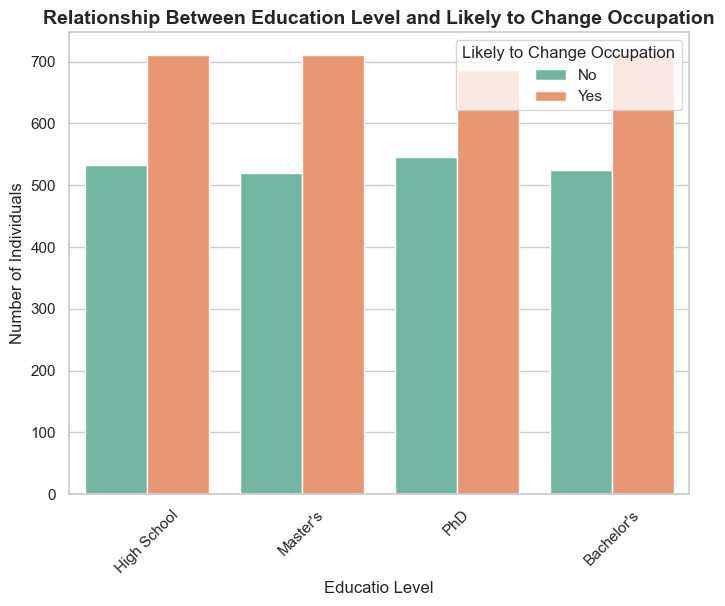

In [7]:
# Relationship Between Educational Background and Job Change

plt.figure(figsize=(8,6))
sns.countplot(data=eda_df, x="Education Level",hue="Likely to Change Occupation", palette="Set2")
plt.title("Relationship Between Education Level and Likely to Change Occupation", fontsize=14, fontweight='bold')
plt.xlabel("Educatio Level")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=45)
plt.legend(title="Likely to Change Occupation", labels=["No", "Yes"])
plt.show()


### Findings: Relationship Between Education Level and Job Change Likelihood
Across all education levels, the “Yes” category is consistently higher, indicating that people are generally more likely than not to consider changing jobs regardless of their qualification.
The number of individuals likely to change occupation remains relatively uniform across education groups, with no category showing a distinctly lower or higher tendency. This suggests that education level does not appear to be a major factor influencing job-change intention in this dataset.
The pattern aligns with earlier summary statistics, reinforcing that job change likelihood is stable across different academic backgrounds.


### Effect of Work Experience on Job Change Likelihood

This section investigates how an individual’s **years of work experience** relate to their **likelihood of changing occupation**.  
The analysis uses a boxplot to visualize the distribution of work experience for individuals who are either likely (“Yes”) or unlikely (“No”) to change jobs.  

By comparing median values and interquartile ranges (Q1–Q3), this visualization highlights differences in central tendency and variability between the two groups.  
The inclusion of quartile annotations provides a clearer understanding of how work experience influences job stability and career transition tendencies within the workforce.



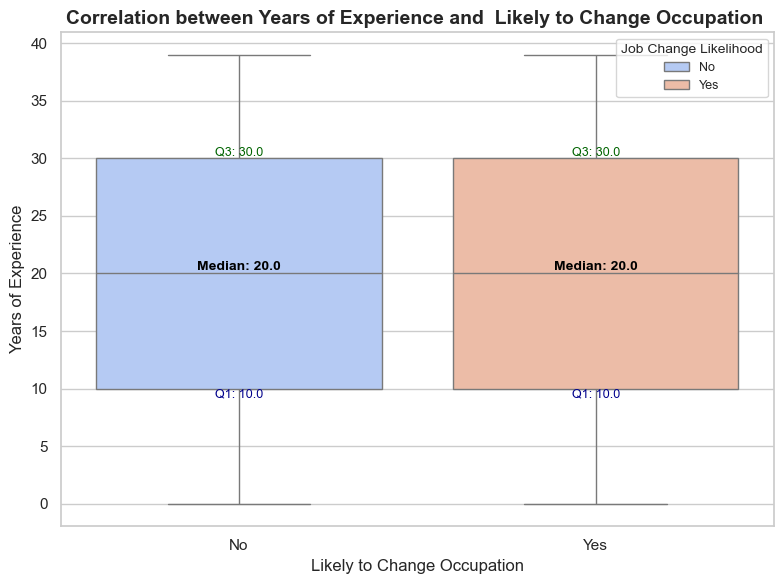

In [8]:
# visualization with median and IQR annotations (and keep the legend)
plt.figure(figsize=(8,6))
ax = sns.boxplot(
    data=eda_df,
    x="Likely to Change Occupation",
    y="Years of Experience",
    hue="Likely to Change Occupation",     # Explicitly set hue to fix FutureWarning
    palette="coolwarm",
    legend=True                 # Keep legend visible
)

# Add title and labels
plt.title("Correlation between Years of Experience and  Likely to Change Occupation ", fontsize=14, fontweight='bold')
plt.xlabel("Likely to Change Occupation")
plt.ylabel("Years of Experience")

# Compute Q1, Median, Q3
iqr_stats = (
    eda_df.groupby("Likely to Change Occupation")["Years of Experience"]
    .describe()[["25%", "50%", "75%"]]
    .rename(columns={"25%": "Q1", "50%": "Median", "75%": "Q3"})
)

# Annotate each box with Q1, Median, and Q3
for i, (label, row) in enumerate(iqr_stats.iterrows()):
    ax.text(i, row["Median"], f"Median: {row['Median']:.1f}", 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='semibold')
    ax.text(i, row["Q1"], f"Q1: {row['Q1']:.1f}", 
            ha='center', va='top', fontsize=9, color='darkblue')
    ax.text(i, row["Q3"], f"Q3: {row['Q3']:.1f}", 
            ha='center', va='bottom', fontsize=9, color='darkgreen')

# Show legend (explicit positioning for better layout)
plt.legend(title="Job Change Likelihood", loc="upper right", fontsize=9, title_fontsize=10)
plt.tight_layout()
plt.show()

**Interpretation** 

This boxplot compares the distribution of **Years of Experience** for individuals who are likely (“Yes”) and not likely (“No”) to change occupations.  
The median years of experience is identical for both groups (“Yes” and “No”), showing no meaningful difference in central tendency. Q1 and Q3 values are also very similar across the two categories, indicating that the overall distribution of experience is nearly the same for both groups. The spread of the data (IQR) overlaps substantially, suggesting no clear pattern linking experience level to job-change intention.
This visual evidence implies that years of experience does not appear to influence whether an individual is likely to change occupation in this dataset.

---

***Introduction: Salary vs. Likelihood of Job Change***

This visualisation examines whether salary levels differ between individuals who are likely to change occupations and those who are not.
A boxplot is used to compare the salary distribution for the two groups, with quartile statistics (Q1, Median, Q3) displayed directly on the plot.
This helps reveal whether salary is a potential factor influencing job-change intentions


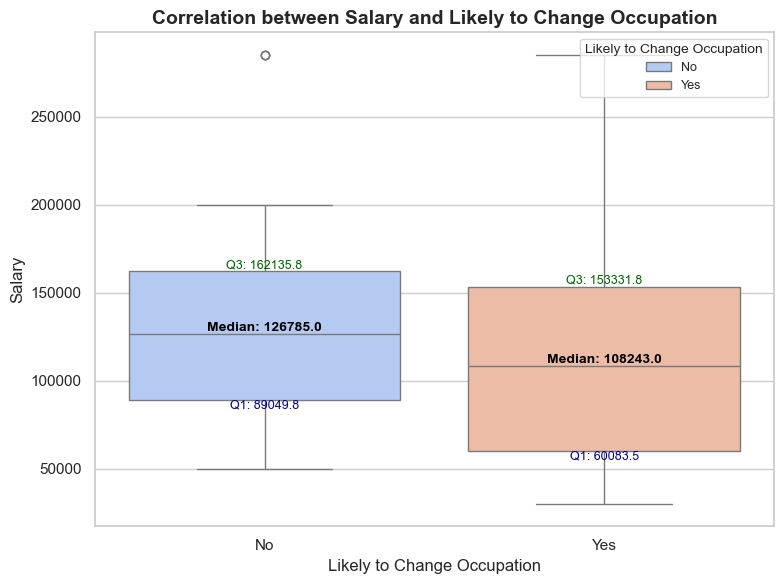

In [8]:
# visualization with median and IQR annotations (and keep the legend)
plt.figure(figsize=(8,6))
ax = sns.boxplot(
    data=eda_df,
    x="Likely to Change Occupation",
    y="Salary",
    hue="Likely to Change Occupation",     # Explicitly set hue to fix FutureWarning
    palette="coolwarm",
    legend=True                 # Keep legend visible
)

# Add title and labels
plt.title("Correlation between Salary and Likely to Change Occupation", fontsize=14, fontweight='bold')
plt.xlabel("Likely to Change Occupation")
plt.ylabel("Salary")

# Compute Q1, Median, Q3
iqr_stats = (
    eda_df.groupby("Likely to Change Occupation")["Salary"]
    .describe()[["25%", "50%", "75%"]]
    .rename(columns={"25%": "Q1", "50%": "Median", "75%": "Q3"})
)

# Annotate each box with Q1, Median, and Q3
for i, (label, row) in enumerate(iqr_stats.iterrows()):
    ax.text(i, row["Median"], f"Median: {row['Median']:.1f}", 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='semibold')
    ax.text(i, row["Q1"], f"Q1: {row['Q1']:.1f}", 
            ha='center', va='top', fontsize=9, color='darkblue')
    ax.text(i, row["Q3"], f"Q3: {row['Q3']:.1f}", 
            ha='center', va='bottom', fontsize=9, color='darkgreen')

# Show legend (explicit positioning for better layout)
plt.legend(title="Likely to Change Occupation", loc="upper right", fontsize=9, title_fontsize=10)
plt.tight_layout()
plt.show()

### Interpretation: Salary vs Likelihood to Change Occupation

The boxplot shows a clear difference in salary between individuals likely and not likely to change occupations. Those who are not likely to change jobs have a higher median salary (≈ £126,785) compared to those who are likely to change jobs (≈ £108,243). 

The lower quartile for the "Yes" group is significantly lower, indicating that many low-salary individuals are considering job changes. The interquartile ranges (IQRs) differ noticeably, with the “Yes” group displaying greater variation in salary, especially at the lower end.

Overall, the plot suggests that lower salary is associated with a greater likelihood of considering a job change, while higher salary appears to promote job stability. This interpretation is further supported by the statistically significant Mann–Whitney U test result.


### Relationship Between Education Level, Experience, and Job Change Likelihood

This analysis examines how an individual’s **education level** relates to their **years of professional experience** and **likelihood of changing occupation**.  
A boxplot was used to visualize the distribution of work experience across different education levels, segmented by job-change likelihood (“Yes” or “No”).

Each box represents the spread (interquartile range), median, and variability of experience within an education category, while quartile annotations (Q1, Median, Q3) provide additional statistical detail.  
This visualization helps reveal whether higher education correlates with longer experience or a greater tendency to seek career changes.


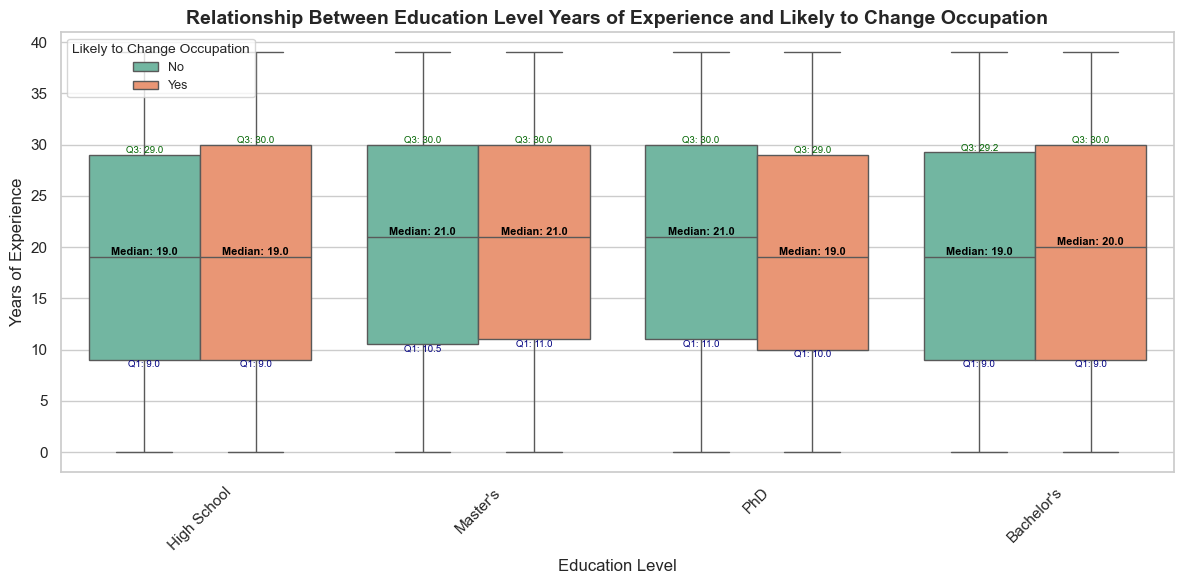

In [9]:
# Relationship between Education Level, Experience, and Likelihood to Change Occupation (Annotated Boxplot)
plt.figure(figsize=(12,6))
ax = sns.boxplot(
    data=eda_df,
    x="Education Level",
    y="Years of Experience",
    hue="Likely to Change Occupation",
    palette="Set2"
)

plt.title("Relationship Between Education Level Years of Experience and Likely to Change Occupation", fontsize=14, fontweight='bold')
plt.xlabel("Education Level")
plt.ylabel("Years of Experience")
plt.xticks(rotation=45)

# --- Compute IQR stats for each group ---
iqr_stats = (
    eda_df.groupby(["Education Level", "Likely to Change Occupation"])["Years of Experience"]
    .describe()[["25%", "50%", "75%"]]
    .rename(columns={"25%": "Q1", "50%": "Median", "75%": "Q3"})
    .reset_index()
)

# --- Annotate boxes with IQR stats ---
# For each x-tick (Education Level) and hue category (Yes/No)
x_positions = ax.get_xticks()
hue_count = len(eda_df["Likely to Change Occupation"].unique())
width = 0.8 / hue_count  # width offset per hue

for i, row in enumerate(iqr_stats.itertuples()):
    edu_idx = list(eda_df["Education Level"].unique()).index(row._1)
    hue_idx = 0 if row._2 == "No" else 1  # assumes two hue levels: No/Yes
    xpos = edu_idx - 0.4 + (hue_idx + 0.5) * width

    # plot annotations
    plt.text(xpos, row.Median, f"Median: {row.Median:.1f}",
             ha='center', va='bottom', fontsize=8, color='black', weight='semibold')
    plt.text(xpos, row.Q1, f"Q1: {row.Q1:.1f}",
             ha='center', va='top', fontsize=7, color='navy')
    plt.text(xpos, row.Q3, f"Q3: {row.Q3:.1f}",
             ha='center', va='bottom', fontsize=7, color='darkgreen')

plt.legend(title="Likely to Change Occupation", loc="upper left",
           fontsize=9, title_fontsize=10, frameon=True)
plt.tight_layout()
plt.show()


### Findings: Education Level, Experience, and Job Change Likelihood


# ✅ **Markdown Introduction**

### **📊 Introduction: Education Level, Experience, and Job-Change Likelihood**

This section explores whether *Years of Experience* varies across different *Education Levels* and whether this variation relates to an individual’s likelihood of changing occupations.
A grouped boxplot is used to compare distributions for “Yes” and “No” job-change categories across four educational groups.
Quartiles (Q1, Median, Q3) are annotated to highlight differences in central tendency and spread.
This helps determine whether experience combined with education level influences job-change intentions.

---

# ✅ **Markdown Conclusion / Key Findings**

### **📌 Key Findings: Experience Across Education Levels**

* **Experience levels are highly similar across all education groups.**
  Median experience values range only slightly between 19 and 21 years for High School, Bachelor's, Master's, and PhD groups.

* **No meaningful difference exists between “Yes” and “No” categories within each education level.**
  For every education group, both medians and IQRs for the two categories almost completely overlap.

* **Interquartile ranges (Q1–Q3) are nearly identical across the board**, showing that respondents, regardless of education, tend to have similar levels of experience.

* **Overall, neither education level nor years of experience appears to influence job-change likelihood.**
  This means job-change behaviour is consistent across experience levels and academic qualifications.

---

If you have another snippet, feel free to send it!

    

In [10]:
# Contingency table
contingency_table = pd.crosstab(eda_df["Education Level"], eda_df["Likely to Change Occupation"])

print("Contingency Table:")
display(contingency_table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results")
print("------------------------")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

# Expected frequencies table
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print("\nExpected Frequencies:")
display(expected_df)


Contingency Table:


Likely to Change Occupation,No,Yes
Education Level,,
Bachelor's,524,712
High School,532,711
Master's,519,710
PhD,545,687



Chi-Square Test Results
------------------------
Chi-square statistic: 1.2580
Degrees of freedom: 3
P-value: 0.7391

Expected Frequencies:


Likely to Change Occupation,No,Yes
Education Level,,
Bachelor's,530,706
High School,533,710
Master's,527,702
PhD,529,703


### Chi-Square Test Interpretation: Education Level vs Job Change Likelihood

The Chi-square test examined whether the distribution of job change likelihood ("Yes" or "No") varies across different education levels. The result was not statistically significant (χ² = 1.258, p = 0.739).

Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This indicates that education level does not have a significant association with an individual's likelihood of changing occupations.

The observed and expected frequencies were very similar across all education categories, confirming that job change intentions are evenly distributed regardless of educational attainment. Therefore, education alone does not appear to influence career change likelihood in this dataset.


### Mann–Whitney U Test: Salary vs Job Change Likelihood

Since salary is a non-normally distributed quantitative variable, and job change likelihood is a binary categorical variable (“Yes” or “No”), the Mann–Whitney U test was used to determine whether salary differs significantly between individuals likely and not likely to change occupations. This non-parametric test compares the median salary levels of the two groups without assuming normality.


In [11]:
# Mann–Whitney U Test: Salary vs Job Change Likelihood

# Split salary into two groups
salary_no = eda_df[eda_df["Likely to Change Occupation"] == "No"]["Salary"]
salary_yes = eda_df[eda_df["Likely to Change Occupation"] == "Yes"]["Salary"]

# Mann–Whitney U test (two-sided)
u_stat, p_value = mannwhitneyu(salary_no, salary_yes, alternative='two-sided')

print("Mann–Whitney U Test: Salary vs Likely to Change Occupation")
print("---------------------------------------------------")
print(f"U statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Mann–Whitney U Test: Salary vs Likely to Change Occupation
---------------------------------------------------
U statistic: 3580371.00
P-value: 0.0000


### Interpretation

The Mann–Whitney U test returned a U statistic of **3,580,371** with a **p-value < 0.0001**, indicating a statistically significant difference in salary between individuals who are likely and not likely to change occupations. Because the p-value is effectively zero, we reject the null hypothesis and conclude that salary levels differ meaningfully between the two groups.

This result aligns with the earlier boxplot: individuals who are **not** likely to change jobs tend to earn **higher salaries**, while those who are likely to change occupations generally earn **lower salaries**. Therefore, salary appears to be an important factor associated with job change intentions in this dataset.


### Mann–Whitney U Test: Years of Experience vs Job Change Likelihood

To examine whether work experience differs between individuals who are likely and not likely to change occupations, a Mann–Whitney U test was conducted. This non-parametric test is suitable because Years of Experience is continuous and not normally distributed, and the comparison involves two independent groups (“Yes” vs. “No”).


In [12]:
# Mann–Whitney U Test: Experience vs Job Change Likelihood")

exp_no = eda_df[eda_df["Likely to Change Occupation"] == "No"]["Years of Experience"]
exp_yes = eda_df[eda_df["Likely to Change Occupation"] == "Yes"]["Years of Experience"]

u_stat, p_value = mannwhitneyu(exp_no, exp_yes, alternative='two-sided')

print("Mann–Whitney U Test: Years of Experience vs Likely to Change Occupation")
print("--------------------------------------------------------")
print(f"U statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Mann–Whitney U Test: Years of Experience vs Likely to Change Occupation
--------------------------------------------------------
U statistic: 2972641.00
P-value: 0.7385


### Interpretation

The Mann–Whitney U test comparing Years of Experience between individuals who are likely and not likely to change occupations returned a U statistic of **2,972,641** and a **p-value of 0.7385**. Because the p-value is much greater than the 0.05 threshold, we fail to reject the null hypothesis.

This means there is **no statistically significant difference** in work experience between the two groups. Individuals who are likely to change occupations and those who are not likely to change occupations have very similar experience levels.

This result aligns with the earlier boxplot visualization, which showed nearly identical medians, quartiles, and ranges across both groups. Therefore, **work experience does not appear to be a meaningful driver of job change intentions in this dataset.**

